#### <i> Predictive Analytics for Customer Retention Machine Learning Models to Analyze and Mitigate Churn in ECommerce Platforms </i>
#### <i> Import Library files </i>

In [1]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


#### <i> Load the Dataset </i>

In [2]:
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name="E Comm")
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


#### <i> Dataset Overview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


#### <i> Data Preprocessing </i>

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Preview data
print("Initial Data Preview:")
print(df.head())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing numerical columns with median
numerical_cols = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear',
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder'
]

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
categorical_cols = [
    'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
    'PreferedOrderCat', 'MaritalStatus'
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for inverse transform if needed

# Normalize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Final check
print("\nPost-processed Data Preview:")
print(df.head())




Initial Data Preview:
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore

#### <i> Data Visulization And Analysis </i>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

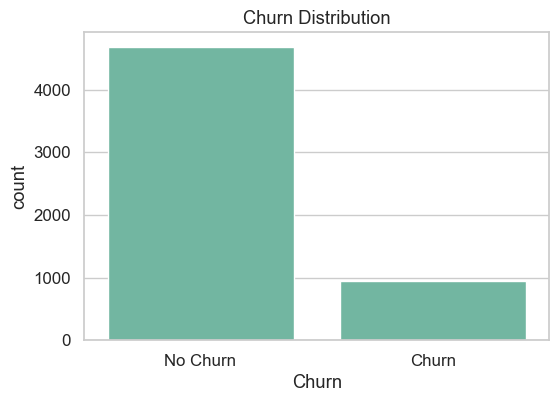

In [7]:
# Plot aesthetics
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)
os.makedirs("figures", exist_ok=True)

#  Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.savefig("figures/1_churn_distribution.png")
plt.show()

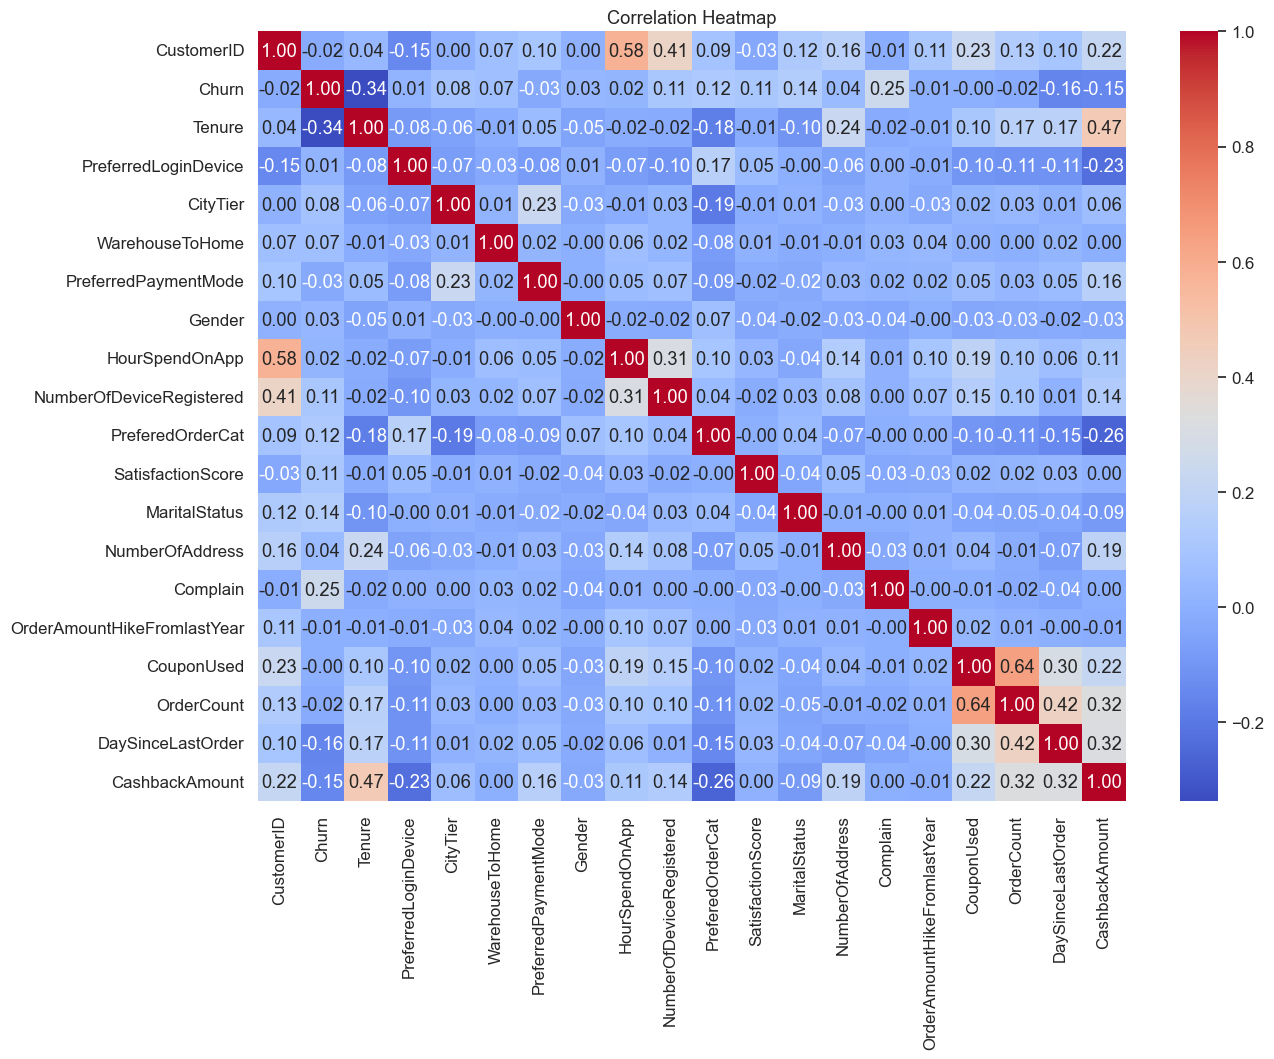

In [8]:
#  Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("figures/2_correlation_heatmap.png")
plt.show()

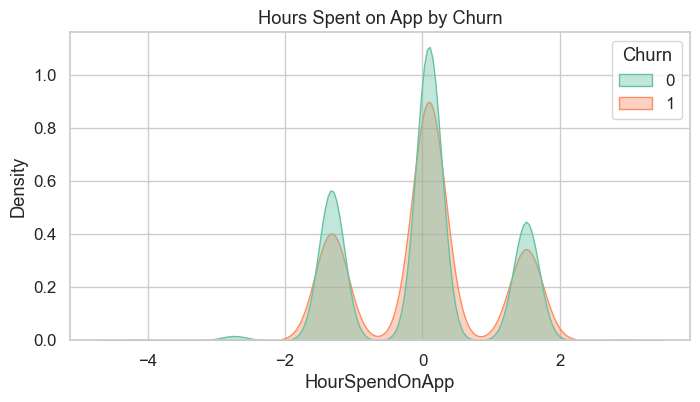

In [9]:
#  Hour Spent on App by Churn
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='HourSpendOnApp', hue='Churn', fill=True, common_norm=False, alpha=0.4)
plt.title("Hours Spent on App by Churn")
plt.savefig("figures/4_hours_spent_on_app.png")
plt.show()

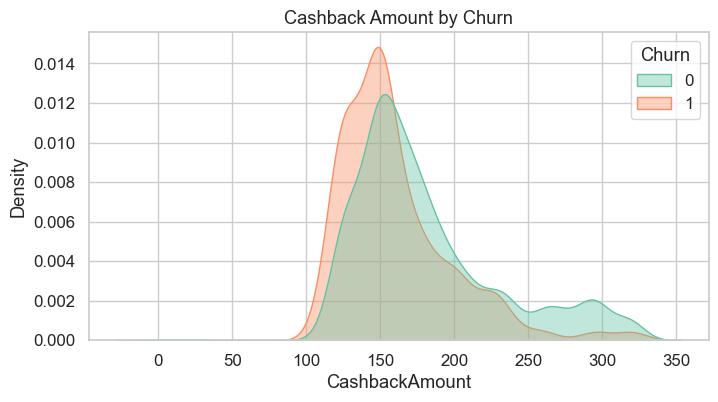

In [10]:
#  Cashback Amount Distribution by Churn
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='CashbackAmount', hue='Churn', fill=True, common_norm=False, alpha=0.4)
plt.title("Cashback Amount by Churn")
plt.savefig("figures/5_cashback_amount.png")
plt.show()

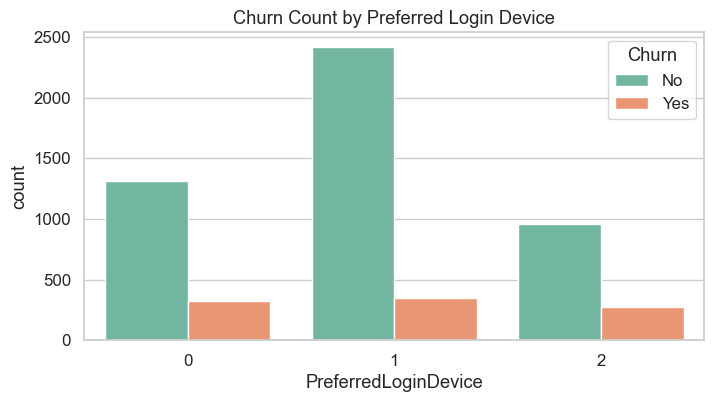

In [11]:
#  Churn by Preferred Login Device
plt.figure(figsize=(8, 4))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title("Churn Count by Preferred Login Device")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.savefig("figures/7_churn_by_device.png")
plt.show()

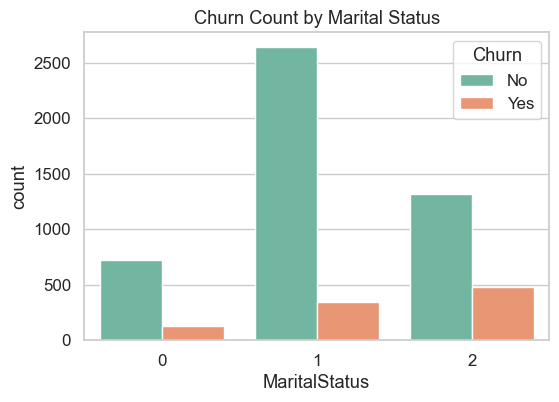

In [12]:
#  Churn by Marital Status
plt.figure(figsize=(6, 4))
sns.countplot(x='MaritalStatus', hue='Churn', data=df)
plt.title("Churn Count by Marital Status")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.savefig("figures/9_churn_by_marital_status.png")
plt.show()

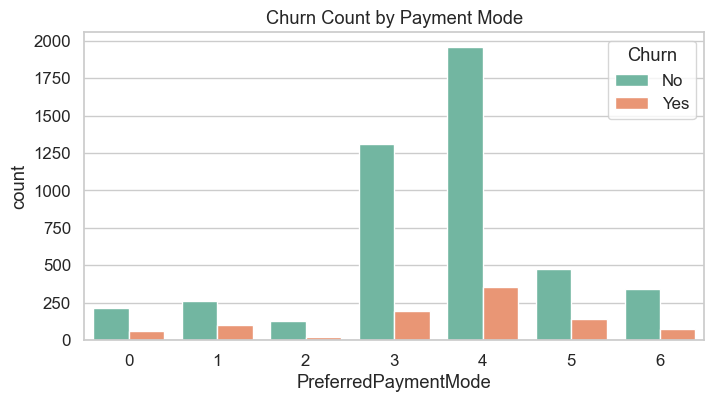

In [13]:
#  Churn by Preferred Payment Mode
plt.figure(figsize=(8, 4))
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df)
plt.title("Churn Count by Payment Mode")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.savefig("figures/8_churn_by_payment_mode.png")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [15]:
#Features and target
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

# Identify columns
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
])

#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [16]:
from sklearn.linear_model import LogisticRegression

# Pipeline
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

# Hyperparameter tuning
logistic_params = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}
logistic_grid = GridSearchCV(logistic_pipeline, logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

# Predictions
y_pred_log = logistic_grid.predict(X_test)

# Results
print("📘 Logistic Regression Results")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


📘 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1171
           1       0.76      0.38      0.51       237

    accuracy                           0.88      1408
   macro avg       0.83      0.68      0.72      1408
weighted avg       0.87      0.88      0.86      1408

Accuracy: 0.8764204545454546


#### <i> Random Forest Classifier </i>

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning
rf_params = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10, None],
    'clf__min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_grid.predict(X_test)

# Results
print("\n🌲 Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



🌲 Random Forest Results
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1171
           1       0.95      0.86      0.90       237

    accuracy                           0.97      1408
   macro avg       0.96      0.92      0.94      1408
weighted avg       0.97      0.97      0.97      1408

Accuracy: 0.9680397727272727


#### <i> XGB Classifier </i>

In [18]:
from xgboost import XGBClassifier

# Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Hyperparameter tuning
xgb_params = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2]
}
xgb_grid = GridSearchCV(xgb_pipeline, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_grid.predict(X_test)

# Results
print("\n🚀 XGBoost Results")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))



🚀 XGBoost Results
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1171
           1       0.96      0.94      0.95       237

    accuracy                           0.98      1408
   macro avg       0.97      0.97      0.97      1408
weighted avg       0.98      0.98      0.98      1408

Accuracy: 0.9836647727272727


#### <i> Comparision Of All Models </i>

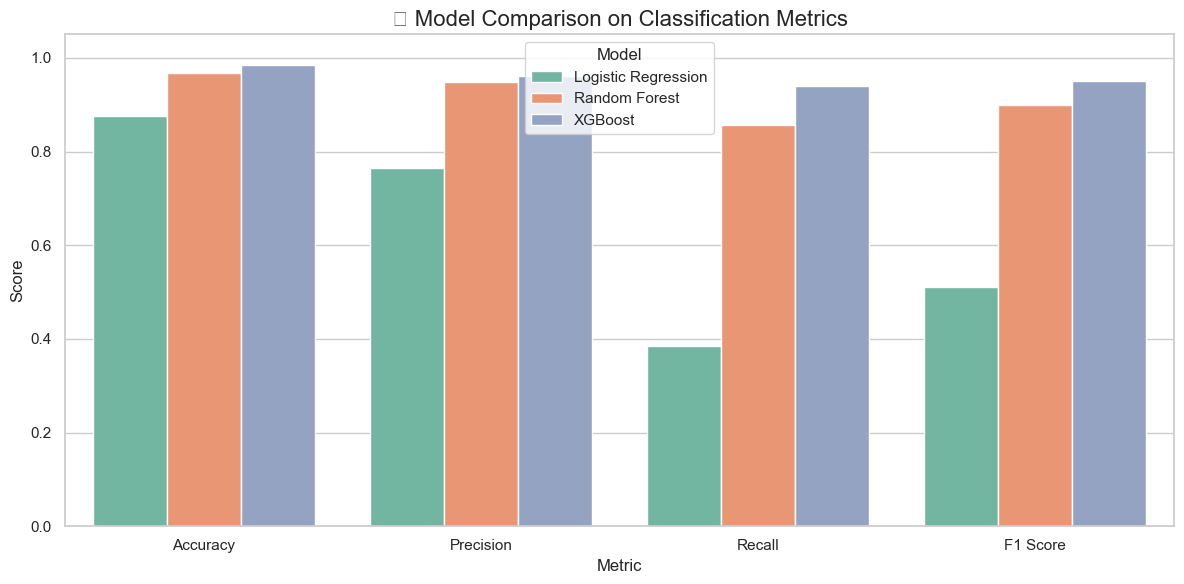

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Collect results into a dictionary
model_results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_log),
        "Precision": precision_score(y_test, y_pred_log),
        "Recall": recall_score(y_test, y_pred_log),
        "F1 Score": f1_score(y_test, y_pred_log)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1 Score": f1_score(y_test, y_pred_rf)
    },
    "XGBoost": {
        "Accuracy": accuracy_score(y_test, y_pred_xgb),
        "Precision": precision_score(y_test, y_pred_xgb),
        "Recall": recall_score(y_test, y_pred_xgb),
        "F1 Score": f1_score(y_test, y_pred_xgb)
    }
}

# Convert to DataFrame for easier plotting
metrics_df = pd.DataFrame(model_results).T.reset_index().rename(columns={'index': 'Model'})


# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
metrics_df_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

sns.barplot(data=metrics_df_melted, x="Metric", y="Score", hue="Model", palette="Set2")
plt.title("🔍 Model Comparison on Classification Metrics", fontsize=16)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.legend(title="Model")
plt.tight_layout()
plt.show()
